<h1>FLOWS MODEL</h1>

<h1>Data Processing</h1>

In [2]:
import pandas as pd

C:\Users\mj\AppData\Local\Temp\ipykernel_31244\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
rainfall = pd.read_csv("filtered_rainfall.csv")
waterlevel = pd.read_csv("waterlevel.csv")

In [37]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152974 entries, 0 to 152973
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Year      152974 non-null  int64 
 1   Month     152974 non-null  int64 
 2   Day       152974 non-null  int64 
 3   Hour      152974 non-null  int64 
 4   Rainfall  133658 non-null  object
dtypes: int64(4), object(1)
memory usage: 5.8+ MB


In [46]:
waterlevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138194 entries, 0 to 138193
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        138194 non-null  int64 
 1   Month       138194 non-null  int64 
 2   Day         138194 non-null  int64 
 3   Hour        138194 non-null  int64 
 4   WaterLevel  89474 non-null   object
dtypes: int64(4), object(1)
memory usage: 5.3+ MB


In [45]:
waterlevel["Year"] = waterlevel["Year"].astype('int64')

In [50]:
merged_data = pd.merge(
    rainfall,
    waterlevel,
    on=['Year', 'Month', 'Day', 'Hour'],
    how='left'
)

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153010 entries, 0 to 153009
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        153010 non-null  int64 
 1   Month       153010 non-null  int64 
 2   Day         153010 non-null  int64 
 3   Hour        153010 non-null  int64 
 4   Rainfall    133694 non-null  object
 5   WaterLevel  90873 non-null   object
dtypes: int64(4), object(2)
memory usage: 7.0+ MB


In [58]:
merged_data.to_csv('merged_data.csv', index=False)

In [55]:
merged_data["WaterLevel"] = pd.to_numeric(merged_data['WaterLevel'], errors='coerce')
merged_data["Rainfall"] = pd.to_numeric(merged_data['Rainfall'], errors='coerce')

merged_data["WaterLevel"] = merged_data["WaterLevel"].fillna(0)
merged_data["Rainfall"] = merged_data["Rainfall"].fillna(0)

In [56]:
merged_data["WaterLevel"] = merged_data["WaterLevel"].astype('float64')
merged_data["Rainfall"] = merged_data["Rainfall"].astype('float64')

In [57]:
merged_data['WaterLevel'] = merged_data['WaterLevel'].interpolate()
merged_data['Rainfall'] = merged_data['Rainfall'].interpolate()

In [3]:
finaldata = pd.read_csv("finaldata.csv")
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153010 entries, 0 to 153009
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        153010 non-null  int64  
 1   Month       153010 non-null  int64  
 2   Day         153010 non-null  int64  
 3   Hour        153010 non-null  int64  
 4   Rainfall    153010 non-null  float64
 5   WaterLevel  153010 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 7.0 MB


In [36]:
finaldata["FWaterLevel"] = finaldata["WaterLevel"].shift(-6)
finaldata.dropna(inplace=True)
finaldata.to_csv("finaldata2.csv", index=False)

In [37]:
finaldata = pd.read_csv("finaldata2.csv")

In [99]:
finaldata = finaldata[finaldata["Rainfall"] != 0]
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8576 entries, 5 to 153009
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        8576 non-null   int64  
 1   Month       8576 non-null   int64  
 2   Day         8576 non-null   int64  
 3   Hour        8576 non-null   int64  
 4   Rainfall    8576 non-null   float64
 5   WaterLevel  8576 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 469.0 KB


In [ ]:
#Please let this model work

In [ ]:
#PyTorch with Sysidentpy library

In [4]:
pip install sysidentpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\mj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install torch

You should consider upgrading via the 'c:\users\mj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


<h1>Model Training</h1>

In [8]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\mj\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [115]:
train_data = finaldata[finaldata['Year'] <= 2024]
test_data = finaldata[finaldata['Year'] >= 2025]

X_train = train_data[['Rainfall']].values
y_train = train_data['WaterLevel'].values

X_test = test_data[['Rainfall']].values
y_test = test_data['WaterLevel'].values

In [116]:
from sklearn.preprocessing import StandardScaler
# Create scalers for input and output
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit on training data only
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Apply the same transformation to testing data
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [78]:
#initial narx config
n_features = X_train_scaled.shape[1]

class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(n_features, 30)
        self.lin2 = nn.Linear(30, 30)
        self.lin3 = nn.Linear(30, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

In [79]:
basis_function = Polynomial(degree=1)

regressors = regressor_code(
    X=X_train_scaled,
    xlag=6,
    ylag=6,
    model_type="NARMAX",
    model_representation="neural_network",
    basis_function=basis_function,
)

In [80]:
narx_net = NARXNN(
    basis_function=basis_function,
    model_type="NARMAX",
    loss_func="mse_loss",
    optimizer="Adam",
    epochs=2000,
    verbose=True,
    device="cuda"
)

c:\users\mj\appdata\local\programs\python\python39\lib\site-packages\sysidentpy\neural_network\narx_nn.py:156: UserWarning: No CUDA available. We set the device as CPU
  self.device = self._check_cuda(device)


In [81]:
narx_net.net = NARX()

In [82]:
if device == "cuda":
    narx_net.net.to(torch.device("cuda"))

In [117]:
y_train_scaled = y_train_scaled.reshape(-1, 1)
y_test_scaled = y_test_scaled.reshape(-1, 1)

In [118]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_scaled shape: {y_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_test_scaled shape: {y_test_scaled.shape}")

X_train_scaled shape: (152308, 1)
y_train_scaled shape: (152308, 1)
X_test_scaled shape: (702, 1)
y_test_scaled shape: (702, 1)


In [106]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error

class NARX(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.lin1 = nn.Linear(input_dim, 128)
        self.lin2 = nn.Linear(128, 64)
        self.lin3 = nn.Linear(64, 32)
        self.lin4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.leaky_relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leaky_relu(self.lin1(x))
        x = self.dropout(x)
        x = self.leaky_relu(self.lin2(x))
        x = self.leaky_relu(self.lin3(x))
        x = self.lin4(x)
        return x

In [107]:
n_features = X_train_scaled.shape[1]
model = NARX(input_dim=X_train_scaled.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

In [108]:
epochs = 100
batch_size = 6

for epoch in range(epochs):
    model.train()
    for i in range(0, X_train_tensor.size(0), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size].unsqueeze(1)
        y_batch = y_batch.squeeze(-1)
        
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

Epoch 10/100, Loss: 0.15722768008708954
Epoch 20/100, Loss: 0.16885775327682495
Epoch 30/100, Loss: 0.13591532409191132
Epoch 40/100, Loss: 0.15423890948295593
Epoch 50/100, Loss: 0.1705411821603775
Epoch 60/100, Loss: 0.13928215205669403
Epoch 70/100, Loss: 0.13950838148593903
Epoch 80/100, Loss: 0.15492603182792664
Epoch 90/100, Loss: 0.1347290575504303
Epoch 100/100, Loss: 0.15675479173660278


In [109]:
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = mean_squared_error(y_test_tensor.numpy(), y_pred_tensor.numpy())
    print(f"Test Mean Squared Error: {mse}")

Test Mean Squared Error: 0.33397549390792847


In [110]:
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 0.367
Mean Squared Error (MSE): 0.193
Root Mean Squared Error (RMSE): 0.439
R² Score: -0.387


In [112]:
print("Predictions vs Actual Values:")
for i in range(len(y_pred_original)):
    print(f"Prediction: {y_pred_original[i][0]:.3f}, Actual: {y_test_original[i][0]:.3f}")

Predictions vs Actual Values:
Prediction: 0.169, Actual: 0.030
Prediction: 0.218, Actual: 0.210
Prediction: 0.169, Actual: 0.550
Prediction: 0.190, Actual: -0.010
Prediction: 0.300, Actual: -0.210
Prediction: 0.220, Actual: -0.380
Prediction: 0.218, Actual: -0.540
Prediction: 0.169, Actual: -0.540
Prediction: 0.228, Actual: 0.030
Prediction: 0.169, Actual: 0.800
Prediction: 0.169, Actual: -0.100
Prediction: 0.218, Actual: 0.450
Prediction: 0.227, Actual: 0.360
Prediction: 0.169, Actual: -0.020
Prediction: 0.220, Actual: 0.370
Prediction: 0.209, Actual: 0.580
Prediction: 0.169, Actual: 0.650
Prediction: 0.169, Actual: 0.750
Prediction: 0.169, Actual: 0.490
Prediction: 0.169, Actual: 0.090
Prediction: 0.169, Actual: 0.830
Prediction: 0.169, Actual: 0.030
Prediction: 0.218, Actual: 0.520
Prediction: 0.169, Actual: 0.500
Prediction: 0.227, Actual: 0.290
Prediction: 0.218, Actual: -0.520
Prediction: 0.228, Actual: 0.140
Prediction: 0.169, Actual: 0.640
Prediction: 0.227, Actual: 0.720
Predi

<h1>!!!NOT IMPORTANT BELOW!!!!</h1>

In [ ]:
#dummy testing data

x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000, colored_noise=False, sigma=0.01, train_percentage=80
)

In [17]:
basis_function = Polynomial(degree=1)

regressors = regressor_code(
    X=x_train,
    xlag=2,
    ylag=2,
    model_type="NARMAX",
    model_representation="neural_network",
    basis_function=basis_function,
)

In [18]:
n_features = regressors.shape[0]  # the number of features of the NARX net
n_features

4

In [19]:
regressors

array([[1001],
       [1002],
       [2001],
       [2002]])

In [20]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(n_features, 30)
        self.lin2 = nn.Linear(30, 30)
        self.lin3 = nn.Linear(30, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

In [21]:
narx_net.net = NARX()

In [22]:
if device == "cuda":
    narx_net.net.to(torch.device("cuda"))

In [ ]:
#Training Attempt

In [23]:
narx_net.fit(X=x_train, y=y_train, X_test=x_valid, y_test=y_valid)
yhat = narx_net.predict(X=x_valid, y=y_valid)

In [ ]:
print("MSE: ", mean_squared_error(y_valid, yhat))
plot_results(y=y_valid, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

MSE:  0.00019038486972418152


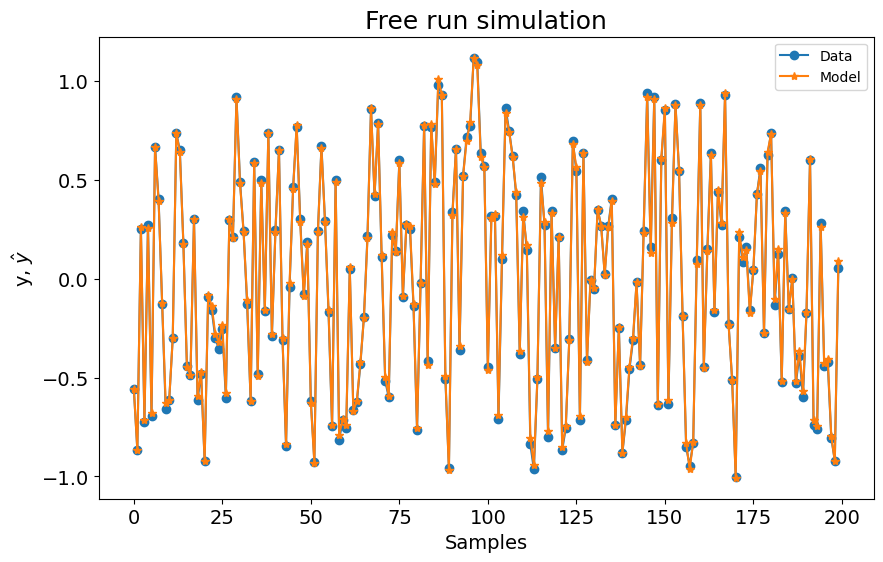

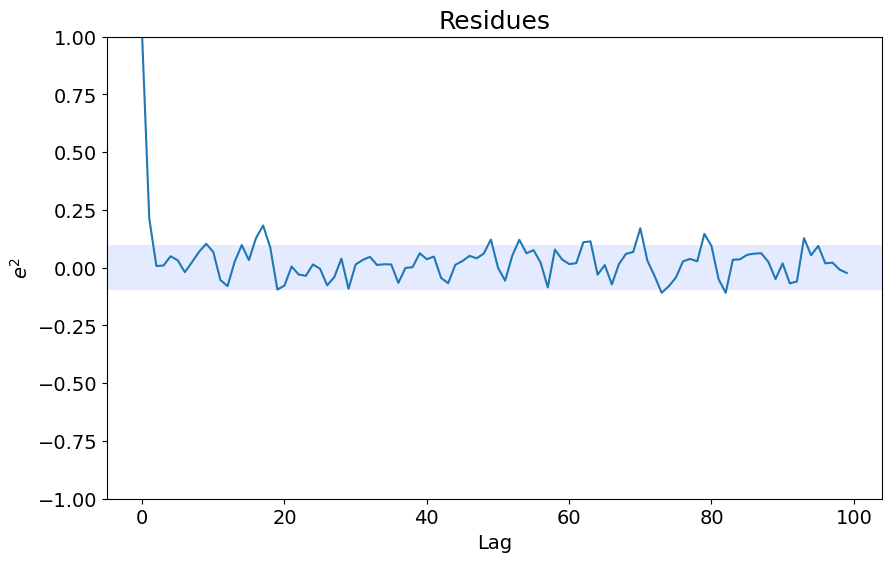

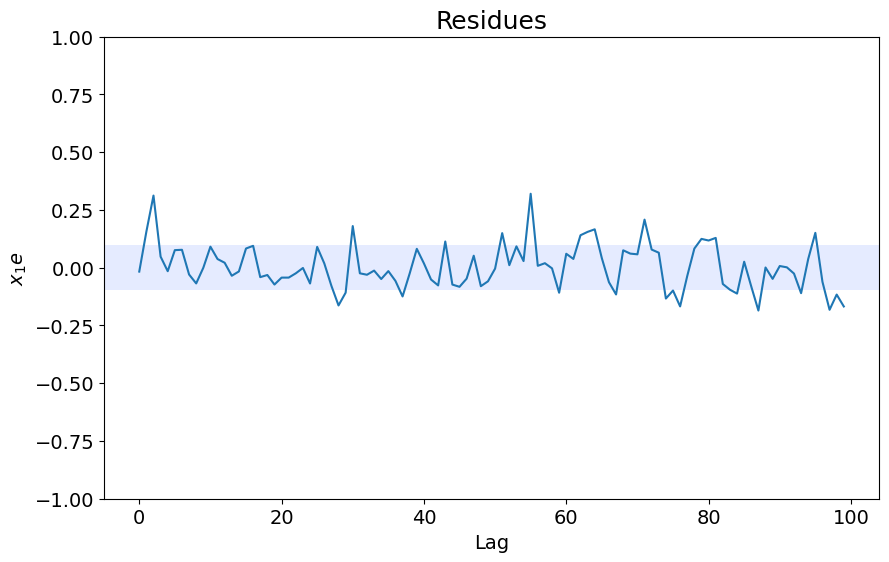

In [24]:
print("MSE: ", mean_squared_error(y_valid, yhat))
plot_results(y=y_valid, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_valid, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_valid, yhat, x_valid)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

In [25]:
yhat = narx_net.predict(X=x_valid, y=y_valid)
print(yhat)

[[-5.55037796e-01]
 [-8.66710067e-01]
 [ 2.62786001e-01]
 [-7.11569607e-01]
 [ 2.56213069e-01]
 [-6.79193079e-01]
 [ 6.65951669e-01]
 [ 3.93842936e-01]
 [-1.23079441e-01]
 [-6.28092825e-01]
 [-6.11638367e-01]
 [-2.98885942e-01]
 [ 7.37262011e-01]
 [ 6.42449379e-01]
 [ 1.76028728e-01]
 [-4.43403393e-01]
 [-4.85478550e-01]
 [ 3.02100807e-01]
 [-5.92436016e-01]
 [-4.70510721e-01]
 [-9.23914373e-01]
 [-8.08898434e-02]
 [-1.36474341e-01]
 [-2.78310567e-01]
 [-3.17685217e-01]
 [-2.31504172e-01]
 [-5.77828825e-01]
 [ 3.03730398e-01]
 [ 2.09280968e-01]
 [ 9.12536800e-01]
 [ 4.83016282e-01]
 [ 2.37383515e-01]
 [-1.05972759e-01]
 [-6.17545009e-01]
 [ 5.84847271e-01]
 [-4.93691117e-01]
 [ 4.87243623e-01]
 [-1.54846221e-01]
 [ 7.40070462e-01]
 [-2.81204611e-01]
 [ 2.35986441e-01]
 [ 6.53399110e-01]
 [-3.00600916e-01]
 [-8.33968341e-01]
 [-1.95944216e-02]
 [ 4.54804063e-01]
 [ 7.80752063e-01]
 [ 2.88416862e-01]
 [-8.84491280e-02]
 [ 1.76322341e-01]
 [-6.29022419e-01]
 [-9.32253063e-01]
 [ 2.3870620

<h1>MODEL 2.0</h1>

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

rainfall = finaldata['Rainfall'].values
waterlevel = finaldata['WaterLevel'].values
fwaterlevel = finaldata['FWaterLevel'].values

In [40]:
scaler_rainfall = MinMaxScaler()
scaler_waterlevel = MinMaxScaler()
scaler_fwaterlevel = MinMaxScaler()
rainfall_scaled = scaler_rainfall.fit_transform(rainfall.reshape(-1, 1))
waterlevel_scaled = scaler_waterlevel.fit_transform(waterlevel.reshape(-1, 1))
fwaterlevel_scaled = scaler_fwaterlevel.fit_transform(fwaterlevel.reshape(-1, 1))

In [88]:
def create_narx_dataset(waterlevel, rainfall, fwaterlevel, n_y, n_u):
    X, y = [], []
    for i in range(len(waterlevel) - max(n_y, n_u)):
        y_input = waterlevel[i:i+n_y].flatten()
        u_input = rainfall[i:i+n_u].flatten()
        X.append(np.concatenate((y_input, u_input)))
        y.append(fwaterlevel[i+n_y])
    return np.array(X), np.array(y)

n_y = 6
n_u = 6
X, y = create_narx_dataset(waterlevel_scaled, rainfall_scaled, fwaterlevel_scaled, n_y, n_u)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [90]:
model = Sequential()
model.add(Dense(64, input_dim=n_y + n_u, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [91]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [59]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [92]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
6120/6120 [==============================] - 14s 2ms/step - loss: 3.9291e-05 - mae: 0.0026 - val_loss: 3.1843e-06 - val_mae: 0.0015
Epoch 2/100
6120/6120 [==============================] - 14s 2ms/step - loss: 2.8744e-05 - mae: 0.0021 - val_loss: 8.0053e-06 - val_mae: 0.0023
Epoch 3/100
6120/6120 [==============================] - 15s 3ms/step - loss: 2.4913e-05 - mae: 0.0020 - val_loss: 6.9118e-06 - val_mae: 0.0023
Epoch 4/100
6120/6120 [==============================] - 17s 3ms/step - loss: 2.3446e-05 - mae: 0.0018 - val_loss: 4.9214e-06 - val_mae: 0.0017
Epoch 5/100
6120/6120 [==============================] - 16s 3ms/step - loss: 2.3086e-05 - mae: 0.0017 - val_loss: 1.8757e-06 - val_mae: 0.0011
Epoch 6/100
6120/6120 [==============================] - 19s 3ms/step - loss: 2.3455e-05 - mae: 0.0017 - val_loss: 2.1772e-06 - val_mae: 0.0012
Epoch 7/100
6120/6120 [==============================] - 19s 3ms/step - loss: 2.3575e-05 - mae: 0.0017 - val_loss: 1.5710e-06 - val_mae:

In [93]:
y_pred = model.predict(X_test)

957/957 [==============================] - 1s 1ms/step


In [94]:
y_test_orig = scaler_fwaterlevel.inverse_transform(y_test.reshape(-1, 1))
y_pred_orig = scaler_fwaterlevel.inverse_transform(y_pred)

In [95]:
def nash_sutcliffe(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

In [96]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)
nse = nash_sutcliffe(y_test_orig, y_pred_orig)

print(f"\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R² Score: {r2:.2f}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 0.25736
R² Score: 0.48
Nash-Sutcliffe Efficiency (NSE): 0.48
Mean Squared Error (MSE): 0.13169
Root Mean Squared Error (RMSE): 0.36288


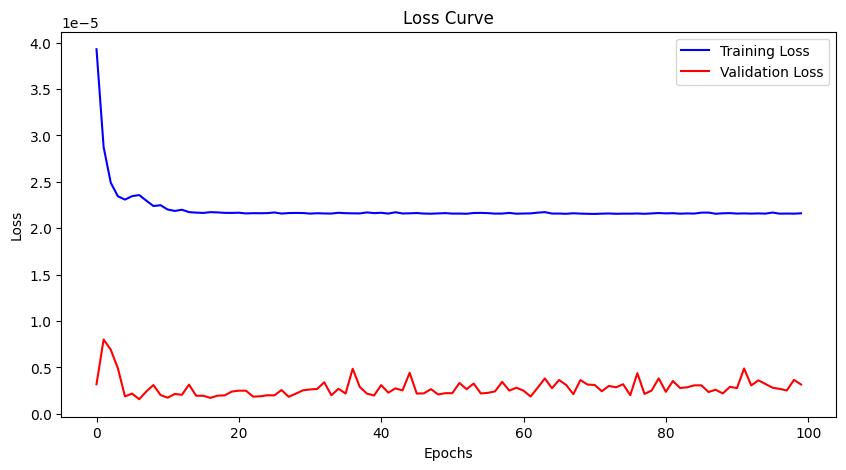

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [98]:
# Print predictions vs actual values
print("\nPredictions vs Actual Values:")
for i in range(min(20, len(y_pred_orig))):  # Print first 20
    print(f"Prediction: {y_pred_orig[i][0]:.3f}, Actual: {y_test_orig[i][0]:.3f}")


Predictions vs Actual Values:
Prediction: -0.524, Actual: -1.410
Prediction: -0.512, Actual: -1.240
Prediction: -0.445, Actual: -1.020
Prediction: -0.404, Actual: -0.790
Prediction: -0.411, Actual: -0.670
Prediction: -0.445, Actual: -0.720
Prediction: -0.440, Actual: -0.970
Prediction: -0.471, Actual: -1.290
Prediction: -0.528, Actual: -1.400
Prediction: -0.533, Actual: -1.430
Prediction: -0.524, Actual: -1.450
Prediction: -0.509, Actual: -1.460
Prediction: -0.480, Actual: -1.470
Prediction: -0.432, Actual: -1.470
Prediction: -0.382, Actual: -1.470
Prediction: -0.334, Actual: -1.200
Prediction: -0.329, Actual: -0.930
Prediction: -0.361, Actual: -0.840
Prediction: -0.443, Actual: -0.860
Prediction: -0.523, Actual: -0.970


<h1>MODEL EXPORT</h1>

In [99]:
model.save('flows_model.h5')

c:\users\mj\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
